# Hypothesis testing


**Course: "Introduction to data analysis methods for HEP"**

*Author: Jose A. Hernando*, January 2017

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*

These is a series of lectures on Data Analysis for High Energy Physics. Emphasis is put on Hypothesis testing and Confidence Intervals. They are based on the excellent lectures on statistics by Prosper [1], Cowan [2] and Cranmer[3] given at CERN Academic Training.

The most common data analysis packages in HEP are ROOT, RooFit and TMVA [8]. But we will use the Python scientic toolkits, Matplotlib, Numpy, Scipy, Scikit-learn [9] that are distributed with Anaconda Python [9]. 

Structure of the course:
1. General Concepts: probability density functions and likelihoods. Frequentist and bayesian statistics
2. Hypothesis testings: test statistic. Continuous hypothesis. CLs method.
3. Confidence Interval: Classical and F.C. intervals.
4. MVA: Classification and Regression
5. Regression: Likelihood estimation.

Structure of the chapter:
0. Introduction
1. Hypothesis testing
2. Significance and power
3. Discovery and rejection
4. Composite hypothesis
5. Nuisance parameters
6. CLs method
7. Bayesian approach

In [1]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

In [2]:
import time

print ' Last Execution ', time.asctime()

 Last Execution  Mon Feb 13 17:30:52 2017


----

## Introduction


Is there a new particle (a Susy partner!) in my data sample? Is this a Higgs boson? A Dark matter candidate? What are the methods to claim a discovery? When do reject a new theory? These are the questions related with hypothesis testing.

In the Neyman's approach, we are confronted with (at least) two competing hypothesis: the well established one (the boring, resilient SM in HEP!), called null hypothesis, $H_0$, and the alternative one (the exiting, awaited New Physics!), $H_1$.

We will construct first a real variable, called test-statistic, that order the possible measurements as more $H_0$ or $H_1$ type. Our observation will lay in a position in that scale.

In some cases, the $H_1$ hypothesis is continous (the strength of a new signal), and the exclusion or discovery of the new signal is closely related with the definition of Confidence Integrals at a given Confidel Level.


----

## 1. Test statistic

The **test estatistics**, $t(x)$, is a real scalar quantity that quantifies how compatible is our measurement, $x$, with the null, $H_0$, and the alternative, $H_1$, hypotheses. We will consider that as $t(x)$ values increases, they indicate a better agreement with $H_1$ than with $H_0$. But notice that this is just an ordering convention!

The optimal test statistic is the likelihood ratio:

$$
\lambda(x) = \frac{ f(x \, | \, H_0)}{ f(x \, | \, H_1)}. 
$$

where $f(x|H_0)$ is the pdf of $x$ under the $H_0$ hypothesis (same for $f(x|H_1$) and $H_1$).

We will use for convenience reasons the quantity, $q(x)$, as test-statistic:

$$
q(x) = -2 \ln \, \lambda(x).
$$

In many cases, we do not know the pdfs and we can not compute the likelihood ratio. Simetimes the problem is a multi-dimensional one, and difficult to get the pdfs. In those cases, several multi-variate methods, such as Neural Networks, Boosted Decision Trees, are used to provide a test statistic (see MVA chapter for classification problems).


**Example:** An experiment expects to measure a quantity, $x$, gaussian distributed with $\mu_0$, $\sigma_0$, that is $H_0$. But, if a given model, $H_1$, is correct, $x$ will be distributed following a gaussian with different parameters $\mu_1$ and $\sigma_1$. Draw the distribution of the test-statistic, $q(x)$, for $H_0$ and $H_1$ samples, using  $\mu_0 = 0, \, \sigma_0 = 1, \, \mu_1 = 4, \, \sigma_1 = 1$.

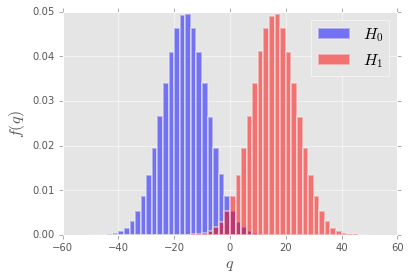

In [3]:
# the test-statistic function
def q(x, mu1=4., s1=1., mu0=0., s0=1.):
    return (x-mu0)*(x-mu0)/(s0*s0) - (x-mu1)*(x-mu1)/(s1*s1)

# hipothesis
h0 = stats.norm(0., 1.)
h1 = stats.norm(4., 1.)

# m-experiments for both hypothesis
m = 1000000
x0s = h0.rvs(size=m)
x1s = h1.rvs(size=m)

# the q-values for the m-experiments of both hypothesis
q0s = q(x0s) 
q1s = q(x1s)

# draw the pdf of q, f(q), for both hypothesis
fig, ax = plt.subplots(figsize=(6, 4))
bins = 50

ax.hist(q0s, bins=bins, normed=True, range=(-50., 50.), color='blue', lw=2, 
        alpha=0.5, label='$H_0$');
ax.hist(q1s, bins=bins, normed=True, range=(-50., 50.), color='red', lw=2,
        alpha=0.5, label='$H_1$')
ax.set_ylabel('$f(q)$', fontsize=16)
ax.set_xlabel('$q$', fontsize=16)
ax.legend(fontsize=16)
fig.savefig('figs/ht_gauss.png');

**Question:** What do you think about what is most likely $H_0$ or $H_1$ if we measure 0? And if we measure -2, 2, and 6? 


**Question:** Discuss what happens when the distributions overlap and when they do not.

**Example:** Consider as null hypothhsis a poisson distribution with $b=4$, background events, and an alternative hypotesis, a signal, $s=4$, on top of the background. 


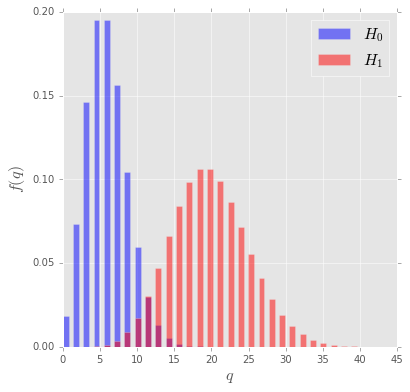

In [4]:
# the test-statistic function
def q(n, b=4, s=4.):
    return 2*n*(np.log(b+s)-np.log(b))

# hipothesis
b, s = 4, 10
h0 = stats.poisson(b)
h1 = stats.poisson(b+s)

# ns: list of possible events
ns = np.arange(30)

# plot the pms for the qs values associated to the events ns, 
# for both hypothesis
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(q(ns), h0.pmf(ns), color='blue', alpha=0.5, label='$H_0$')
ax.bar(q(ns), h1.pmf(ns), color='red', alpha=0.5, label='$H_1$')
ax.set_ylabel('$f(q)$', fontsize=16)
ax.set_xlabel('$q$', fontsize=16)
ax.legend(fontsize=16)
fig.savefig('figs/ht_poisson.png')

**Exercise:** Consider an experiment that measures $m$-values, for the background only hypothesis, the number of expected events is $b_i, \, i=1, \, \dots, m$, and if there is signal, in addition, we expect $s_i \, i = \, 1, \dots, m$. Define the test statistic and compute the pdf for the case when ${\bf b} = (2, 1.5, 1, 0.5) $ and ${\bf s} = (1, 2, 2, 1)$.

**Exercise:** Consider an experiment that measure $(x_1, \, x_2)$. If there is only background, $x_i, \; i=1,\,2$ are distributed with a exponential with $\xi_i, \, i=1, \, 2$. If there is signal, it is distributed with a two gaussians with parameters $(\mu_1, \, \sigma_1)$ for $x_1$, and $(\mu_2, \,\sigma_2)$ for $x_2$. Only positive values are allowed. Define the test statistics and compute its pdf for both hypothesis, consider $\xi_{1,\, 2} = 1$, $\mu_{1, \, 2} = 5$ and $\sigma_{1,2} = 1$.

----

## 2. Significance and power of a test


In order to classify events into $H_0$ or $H_1$ using a cut, $k$, on the test statistics.

$$
t(x) < k
$$

If the test statistics is the likelihood ratio:

$$
\frac{f(x | H_0)}{ f(x | H_1)} < k
$$

A measurement, $x0$, with a $t_0 = t(x_0)$, is classified as $H_0$ if $t_0  < k $ and as $H_1$ if $t_0 \ge k$. This is known as the Neyman's approach. 

We define the **significance** (also called size) of the test, $\alpha$: 

$$
\alpha = \int_{t_c}^{\infty} t(x \, | \, H_0) \, \mathrm{d}x
$$

this is also called *error of 1st kind* and **p-value** of $H_0$. Its the probability of false positives!

The p-values is the probability that we get an outcome with equal or less comptability with a given hypothesis.

And:

$$
\beta = \int_{-\infty}^{t_c} t(x \, | \, H_1) \, \mathrm{d}x
$$

It is the *error of 2nd kind* or the *p-value* of $H_1$. $1-\beta$ is the **power** of the test, the fraction of events classified as $H_1$ when $H_1$ is true. The true positives!

The **Neyman-Person lemma** stablish that the optimal test statistic is the **likelihood ratio**. Optimal indicates that we obtain the maximum power for a fix significance of the test. 

**Question:** What p-value you consider "reasonable" to reject a given hypothesis?
    
**Example**: In the case of the two gaussian, $H_0$ a normal gaussian, and $H_1$ a gaussian with $\mu = \, 4, \, \sigma = \, 1$. If we measure 2. What the p-value with respect $H_0$ and $H_1$? What is the significance and power of th test?
Repeat the questions if we measure 0 or 4.

alpha, p value of H0 for x 2.0:  2.29 %
beta, p value of H1 for x 2.0:  2.26 %
significance 0.023 and power 0.977 of the test 


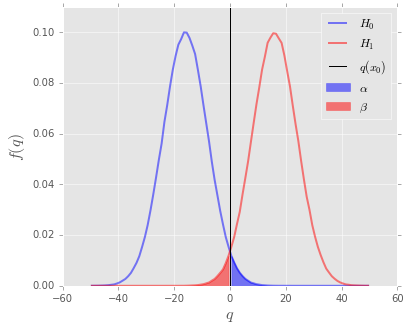

In [5]:
# the test-statistic function
def q(x, mu1=4., s1=1., mu0=0., s0=1.):
    return (x-mu0)*(x-mu0)/(s0*s0) - (x-mu1)*(x-mu1)/(s1*s1)

# hipothesis
h0 = stats.norm(0., 1.)
h1 = stats.norm(4., 1.)

# m-experiments for both hypothesis
m = 1000000
x0s = h0.rvs(size=m)
x1s = h1.rvs(size=m)

# the q-values for the m-experiments of both hypothesis
q0s = q(x0s) 
q1s = q(x1s)

x = 2
q0 = q(x)
alpha = 1.*len([qi for qi in q0s if qi >= q0])/(1.*m)
beta = 1*len([qi for qi in q1s if qi<=q0])/(1.*m)

print 'alpha, p value of H0 for x {:3.1f}: {:5.2f} %'.format(x, 100.*alpha)
print 'beta, p value of H1 for x {:3.1f}: {:5.2f} %'.format(x, 100*beta)
print 'significance {:5.3f} and power {:5.3f} of the test '.format(alpha, 1.-beta)


# draw the pdfs of the test statatistics for both hypothesis 
# and the area under alpha and beta
fig, ax = plt.subplots(figsize=(6, 5))
bins = 100
q0contents, xedges = np.histogram(q0s, bins=bins, range=(-50., 50.))
q1contents, xedges = np.histogram(q1s, bins=bins, range=(-50., 50.))
xcenters = 0.5*(xedges[1:]+xedges[:-1])
xwidth = 0.5*(xedges[1]-xedges[0])
ids_alpha = np.where(xcenters >= q0)
ids_beta = np.where(xcenters <= q0)
ax.plot(xcenters, q0contents/(m*xwidth), color='blue', lw=2, 
        alpha=0.5, label='$H_0$')
ax.plot(xcenters, q1contents/(m*xwidth), color='red', lw=2, 
        alpha=0.5, label='$H_1$')
ax.fill_between(xcenters[ids_alpha], 0., q0contents[ids_alpha]/(m*xwidth), 
                color='blue', alpha=0.5, label=r'$\alpha$')
ax.fill_between(xcenters[ids_beta], 0., q1contents[ids_beta]/(m*xwidth), 
                color='red', alpha=0.5, label=r'$\beta$')
ax.plot((q0, q0), (0., 0.11), color='black', label='$q(x_0)$')
ax.set_ylabel('$f(q)$', fontsize=16)
ax.set_xlabel('$q$', fontsize=16)
ax.set_ylim(0., 0.11)
ax.legend()
fig.savefig('figs/ht_gauss_sizepower.png');

**Example:** Compute the power and significance.

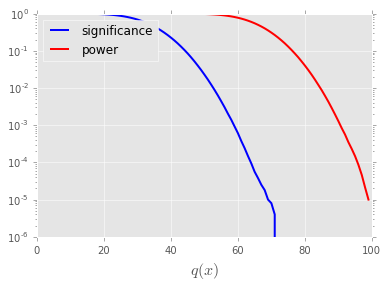

In [6]:
# the size vs power
ids = np.arange(bins)
size = [np.sum(q0contents[id:])/(1.*m) for id in ids]
power = [np.sum(q1contents[id:])/(1.*m) for id in ids]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(ids, size, color='blue', lw=2, label='significance')
ax.plot(ids, power, color='red', lw=2, label='power')
ax.set_xlabel('$q(x)$', fontsize=16)
ax.grid(True)
ax.set_yscale('log')
ax.legend(loc=2);
fig.savefig('figs/ht_gauss_sizevspower.png')

----

## 3. Discovery and rejection

Conventions in HEP:

* We claim **discovery**, reject $H_0$, if its p-value is lower that 5-sigmas, $\alpha < \, 2.87 \times 10^{-7}$. Notice that there is a heated debate about the '5-$\sigma$s'! It is also normal practice to call **observation** if we reject $H_0$ at 3 sigmas. 
* Set an **exclusion** on $H_1$ at 90 \% (95 \%) confidence level, CL, if its p-value, $\beta < \, 0.10 \, (0.05)$.
* We define the **sensititivy** of an experiment as the expected exclusion of $H_1$ at a given CL (i.e 90 %), and its discovery potential.

Notice that the discovery makes reference to $H_0$ p-value, while, exclusion does to $H_1$. 
We will say later (when we dicuss the CLs method) that this could present problems if the experiment has no enough senstivity. 


**Exercise:** An experiment expects $(2, 1)$ background events in two bins, and a possible signal $(8, 9)$ on top. It observes $(9, 9)$, can claim discovery?

**Exercise:** In the case it observes $(1, 1)$, can reject the signal at 95 % CL?

**Exercise:** A second experiment expects $(0.5, 0.3)$ background events for the same signal. What are its prospects to discover the signal or to discart it at 95 % CL?

----

## 4 Composite hypothesis

Often the $H_1$ hypothesis is not complete, it depends on several parameters. A typical example if searching for a new signal with a unkown cross-section. We resume the unknown into a parameter, $\mu$, that quantifies the strength of the signal.
If a model, $H_1$, predict $s$ events, the value $\mu \,s$ covers an interval of hypothesis, when $\mu=0$, we recuperate the case $H_0$, or only background, and when $\mu=1$, we have $H_1$.

In this case, we can treat the scalar parameter $\mu$ and repeat the search for different $\mu$ values. But this can be a tedious process that requieres large computations. 

**Exercise** An experiment search for a new signal expected $s=2$ according with SM, in a background $b=0.4$, but the strength of the signal can be 10 times more. If there is no signal, what is the expected limit in units of $\mu$. If there is signal, can we clain observation?

### 4.1 Profile likelihood ratio for test statitiscs

We can use instead the **profile likelihood ratio**:

$$
\lambda(\mu) = \frac{f(x \, | \, \mu)}{ f(x \, | \, \hat{\mu})}
$$

as a test statistict (where $\hat{\mu}$ is the best estimate of $\mu$, using $x$ data).
This profile likelihood ratio is not likelihood ratio, nevertheless, in most of the cases, it is close to optimal, that is has close to maximum power for a given size of the test.

We can now define the test statistic à la **Feldman-Cousins** [4]:

$$
t_\mu = -2 \ln \lambda(\mu)
$$

That has the nice property, that the pdf of $t_\mu$, $f(t_\mu \, | \, \mu')$ (where $\mu'$ is the true value), is known. In the relevant case where $\mu' = \mu$ (in particular $\mu = \mu' = 0$),  it reduces, thanks to **Wilks' theoreme**, to a $\chi^2$ distribution with one defree of freedom (dof)! To see this, just notice that we can approximate $t_\mu \sim \left( \frac{\mu - \hat{\mu}}{\sigma} \right)^2$, where $\sigma$ is the rms of $\hat{\mu}$, and as the average of $E[\hat{\mu}] = \mu'$, it follows that if $\mu = \mu'$ we then get a $\chi^2$ distribution. In other way, we can read $t_\mu$ as: consider $\mu$ as a possible true value, and we have a best estimate $\hat{\mu}$ from the observation, $t_\mu $ is the ratio of the likelihood of the best estimate with respect our poosible true. In the case in which we consider $\mu$ is *really* the true value, the pdf of $t_\mu$ is a $\chi^2$.

There is in addition simple relation between the value of $t_\mu$ and its p-value:

$$
p_\mu = 2 \, (1 - \Phi(\sqrt{t_\mu}))
$$

where $\Phi(x)$ is the comulative function of a normal gaussian.

To reject the background we will compare our observation with respect $\mu=0$, while to reject a signal we will compare for the full range of $\mu$, and reject that region where $p_\mu < \beta$ (tipically $\beta = 0.05$ or 95 % CL). 

**Example:** Consider the case of an experiment that measures 10 points of an expected gaussian with sigma 1 and mean $b\, +\, \mu \, s$, where $b=0$, $s=4$ and $\mu$ is the strengh parameters. Generate $m$ (large) experiments, as true $\mu=0$ and compute the FC test-statistic $t_\mu$. Do the same generating events for $\mu=1$. Verify that the distribution follows a $\chi^2$ pdf.

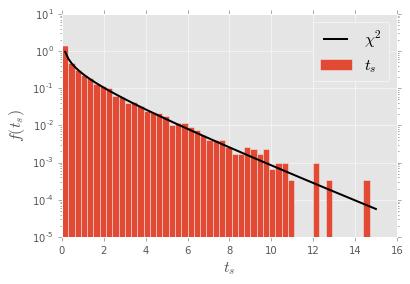

In [7]:
b, s, mutrue, mu = 0., 4., 0., 0.
sigma = 1
size = 10
m = 10000

h0 = stats.norm(b+mutrue*s, sigma)

def experiment():
    return h0.rvs(size)

def muhat(x):
    shat = np.mean(x)
    return (shat-b)/s

def ll(x, mu):
    dx = np.array([(xi-(b+mu*s))/sigma for xi in x])
    return -0.5*np.sum(dx*dx)

def tmu(x, mu=0):
    muh = muhat(x)
    return 2.*(ll(x, muh)-ll(x, mu))

xs = [experiment() for i in range(m)]
muhats = [muhat(xi) for xi in xs]

ts = np.array([tmu(xi, mu) for xi in xs])

fig, ax = plt.subplots()

ax.hist(ts, bins=50, normed=True, range=(0., 15.), label='$t_s$')
chi2 = stats.chi2(1)
xaxis = np.linspace(0., 15, 100) 
ax.plot(xaxis, chi2.pdf(xaxis), color='black', lw=2, label='$\chi^2$')
ax.set_yscale('log')
ax.set_xlabel('$t_s$', fontsize=16)
ax.set_ylabel('$f(t_s)$', fontsize=16)
ax.legend(fontsize=16);
fig.savefig('figs/ht_ts_chi2.png')


Consider the case where $\mu' = 0$. The measurement of extreme values of $\hat{\mu}$ either very low or vert high will result in a large $t_\mu$, but the low values do not challenge the null hypothesis, only the large positive do! For that reason, in order to check the agreement with the null hypothesis, we introduce the following test-statistic [5]:

$$
q_0 = \left\{ \begin{array}{ll} 
-2 \ln \lambda(0) & \mbox{if $\hat \mu >0$} \\
0 & \mbox{if $\hat \mu \le 0$}
\end{array} \right.
$$

where negative values of $\hat{\mu}$ do not produce large $q_0$, they are just 0. The $f(q_0 \, | 0)$, will be now a "half" $\chi^2$ distribution. 
$q_0$ now reads as the ratio of the expected likelihood if the null hypothesis is true with respect the likelihood of the best estimation if this is positive.

In this case there is even a simple relation with the p-value of the null-hypothesis (rejection).

$$
p_0 = 1-\Phi(\sqrt{q_0})
$$

That translate directly into number of sigmas, $Z$:
$$
Z = \sqrt{q_0}
$$

Now, to set a limit on the value of $\mu$, again in $t_\mu$ the $\mu'$ fluctuations, low or high respect to $\mu$, produce large values of $t_\mu$, but here, only the low values challenge the alternative hypothesis. To remove the high values, we take the following test-statistic:

$$
q_\mu = \left\{ \begin{array}{ll} 
-2 \ln \lambda(\mu) & \mbox{if $\hat{\mu} \le \mu$} \\
0 & \mbox{if $\hat{\mu} \gt \mu$}
\end{array} \right.
$$

That read as the ratio of the likelihood of the expected alternative hypothesis with the likelihood of the best estimate, if this one is smaller than the alternative. Again this will produce a "half" $\chi^2$ distribution.

The p-value is then very simple:
$$
p_\mu = 1 - \Phi(\sqrt{q_\mu})
$$

**Example:** Using the above example, get the distribution of $f(q_0 \, | 0)$, and $f(q_\mu \, | \, \mu)$. Verify that they are "half" $\chi^2$ distributions.

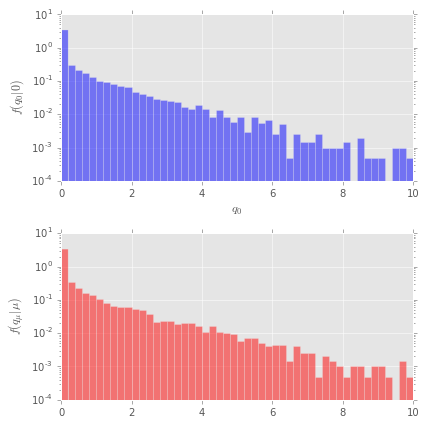

In [8]:
b, s, mu = 0, 4, 1.
sigma , size= 1, 10

def qmu(x, mu):
    muh = muhat(x)
    if (muh > mu): 
        return 0.
    return 2.*(ll(x, muh)-ll(x, mu))

def q0(x):
    muh = muhat(x)
    if (muh <0): 
        return 0.
    return 2.*(ll(x, muh)-ll(x, 0.))

h0 = stats.norm(b, sigma)
h1 = stats.norm(b+mu*s, sigma)

x0s = [h0.rvs(size) for i in range(m)]
xmus = [h1.rvs(size) for i in range(m)]

q0s = np.array([q0(xi) for xi in x0s])
qmus = np.array([qmu(xi, mu) for xi in xmus])

fig, axs = plt.subplots(2, 1, figsize=(6, 6))
ax0, ax1 = axs[0], axs[1]

ax0.hist(q0s, bins=50, normed=True, range=(0., 10.), alpha=0.5, color='blue')
ax0.set_xlabel('$q_0$')
ax0.set_ylabel('$f(q_0|0)$')
ax0.set_yscale('log')
ax1.hist(qmus, bins=50, normed=True, range=(0., 10.), alpha=0.5, color='red')
ax1.set_ylabel('$q_\mu$')
ax1.set_ylabel('$f(q_\mu| \mu)$')
ax1.set_yscale('log');

fig.tight_layout()

**Example:** Consider an planned experiment, that will obtaine 4 measurements. The background is a normal gaussian $\mu_0 = 0, \; \sigma_0=1$, and the signal a gaussian with $\mu_1=3, \sigma _1=1$. If the signal is realized, will the median value of $q_0$ be enough to observe the signal?

q0 at median f(q0|H1) :35.75
number of sigmas, Z :  5.98


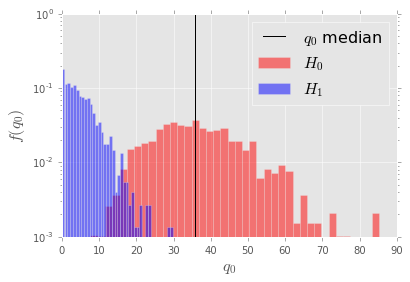

In [9]:
mu0, mu1, sigma = 1, 3, 1
nmeas = 4
mexpe = 1000

h0 = stats.norm(mu0, sigma)
h1 = stats.norm(mu1, sigma)

def experiment(h):
    return np.array(h.rvs(nmeas))

x0s = np.array([experiment(h0) for i in range(mexpe)])
x1s = np.array([experiment(h1) for i in range(mexpe)])

def muhat(xi):
    return np.mean(xi)

def q0(xi):
    mu = muhat(xi)
    if (mu < 0):
        return 0.
    dx2 = xi*xi-(xi-mu)*(xi-mu)
    return np.sum(dx2)

q00s = np.array([q0(xi) for xi in x0s])
q01s = np.array([q0(xi) for xi in x1s])

q01s.sort()
qmed = q01s[len(q01s)/2]
print 'q0 at median f(q0|H1) :{:5.2f}'.format(qmed)
print 'number of sigmas, Z : {:5.2f}'.format(np.sqrt(qmed))

fig, ax = plt.subplots()
ax.hist(q01s, bins=40, normed=True, alpha=0.5, color='red', label='$H_0$');
ax.hist(q00s, bins=40, normed=True, alpha=0.5, color='blue', label='$H_1$')
ax.plot((qmed, qmed), (0., 1.), color='black', label='$q_0$ median')
ax.set_xlabel('$q_0$', fontsize=16)
ax.set_ylabel('$f(q_0)$', fontsize=16)
ax.set_yscale('log')
ax.legend(fontsize=16);
fig.savefig('figs/ht_q0_median.png')

---

## 5. Nuissance parameters 

A nuisance parameter, $\theta$ is a parameter that enters in the definition of the pdf or likelihood but we are not interested on it. The pdf is $f(x \, | \, \mu, \theta)$, were $\mu$ is the parameter of interest, adn $\theta$ the nuisance parameter. In most case, we have an estimation of the parameter, $\hat{\theta}$ and its uncertainty $\sigma_\theta$. And we encounter the problem of how to incorporate its uncertainty into the calculation of the limits.

One possibility is use the Causin-Highland method [ref], also known as a bayesian-frequentist hybrid method.

If we know the pdf of the nuisance parameter: $\pi(\theta)$, we can marginalize its effect [6]:

$$
f(x \, | \, \mu) = \int f( x \, | \, \mu, \theta) \, \pi(\theta) \, \mathrm{d}\theta
$$

where here $\mu$, is the parameter of interest. Its common to take $\pi(\theta)$ as a gaussian with mean $\hat{\theta}$ and sigma $\sigma_\theta$.

In this case, as we marginalize the pdf, we are introducing a bayesian approach. This method is a hybrid: frequentist-bayesian.


**Exercise:** Consider the case of an experiment that expects $b=2 \pm 0.2$ background events, and search for a signal $s=5$. What is the effect of the uncertainty on $b$ in the expected 95% CL limit?

### 5.1 Profile likelihood test statistics

Another possibility, is to extend the likelihood to estimate the nuisance parameter, $\theta$, and use a profile likelihood ratio.

$$
\lambda(\mu) = \frac{f(x \, | \mu \, \hat{\theta}(\mu))}{ f(x \, | \, \hat{\mu}, \hat{\theta} )}
$$

where $\hat{\theta}$ is the best estimate using the likelihood data $x$, and $\hat{\theta}(\mu)$ is the best estimate when fixing $\mu$.


And use the test statistics $q_0$ for discovery and $q_\mu$ for exclusion.

This is the method most used in LHC searches [5].

**Example:** Consider an experiment that search for a signal $b+\mu \, s$, where $s=10$, and the background is measured in a independent region, called "control", where there is no signal, with expected events $\tau b$, whith $\tau=1$. Consider $b$ as the nuisance parameter. The experiment repeat 4 times the measurement and the results are: $(1, 4, 1, 2)$ events in the control sample and $(4, 6, 6, 5)$ in the signal. What is the range of $\mu$ excluded at 95 % CL. Compute $q_0$, is there a discovery? 


This is a prototype of a search. The pdf is:

$$
f(n, \, m \, | \, \mu, \, b) = \frac{(b+\mu \,s)^n \, e^{-(b+\mu\,s)}}{n!} \, \frac{(\tau \, b)^m \, e^{-\tau \, b}}{m!}
$$

where $\mu$ is the parameter of interest, and $b$ the nuisance parameter, $m$ the events in the control region and $n$ the events in the signal region. 


 signal events  [6 8 8 4]
 control events  [2 2 1 1]
 bhat  1.5  muhat  0.5
 best estimate mu : 0.500
 best estimate b :  1.50
 q0: 13.476, Z0 (n-sigmas): 3.671, p-value: 1.21e-04


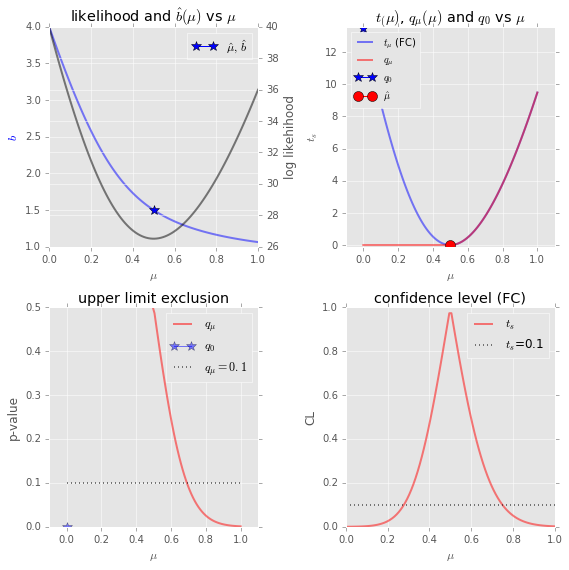

In [10]:
import math
import scipy.misc as misc
import scipy.optimize as optimize

b, s, tmu = 2, 10, 0.5
tau = 1.
nmeas = 4

# generate the events
ms = stats.poisson.rvs(tau*b, size=nmeas)
ns = stats.poisson.rvs(b+tmu*s, size=nmeas)

print ' signal events ', ns
print ' control events ', ms
bshat, bhat = np.mean(ns), np.mean(ms)
muhat = (bshat-bhat)/s
print ' bhat ', bhat, ' muhat ', muhat

# The likelihood function
def llike(ns, ms, mu, b):
    if np.any(b+mu*s < 0.):
        return 1e20
    if np.any(tau*b < 0):
        return 1e20
    pns = stats.poisson.pmf(ns, b+mu*s)
    pms = stats.poisson.pmf(ms, tau*b)
    return -2.*np.sum(np.log(pns))-2.*np.sum(np.log(pms))

# Return the best estimate for the relevant and nuisance parameters
def hat(ns, ms, mu, b):
    ps0 = np.array([mu, b])
    def fun_fit(ps):
        return llike(ns, ms, ps[0], ps[1])
    result = optimize.minimize(fun_fit, ps0, method='Nelder-Mead')
    return result.x

# Return the best estimate for the nuisance parameter 
# when fixing the relevant one
def hhat(ns, ms, mu, b):
    ps0 = np.array([b])
    def fun_fit(ps):
        return llike(ns, ms, mu, ps[0])
    result = optimize.minimize(fun_fit, ps0, method='Nelder-Mead')
    return result.x

# Return the ts test-status
def ts(ns, ms, mu, muhat, bhat):
    b0 = bhat
    bhhat = hhat(ns, ms, mu, b0)
    return llike(ns, ms, mu, bhhat) - llike(ns, ms, muhat, bhat)

# Return the qs test-stats
def qs(ns, ms, mu, muhat, bhat):
    if (muhat > mu): 
        return 0.
    b0 = bhat
    bhhat = hhat(ns, ms, mu, b0)
    return llike(ns, ms, mu, bhhat) - llike(ns, ms, muhat, bhat)
    
# return the q0 test-stats
def q0(ns, ms, mu0, b0):
    muhat, bhat = hat(ns, ms, mu0, b0)
    if (muhat <= 0.): 
        return 0.
    bhhat = hhat(ns, ms, 0., bhat)
    return llike(ns, ms, 0., bhhat) - llike(ns, ms, muhat, bhat)
    
def pvalue(q):
    return 1.-stats.norm.cdf(np.sqrt(q))

# get the results
muhat, bhat = hat(ns, ms, 1., 1.)
print ' best estimate mu : {:5.3f}'.format(muhat)
print ' best estimate b : {:5.2f}'.format(bhat)

q0val = q0(ns, ms, 0., bhat)
p0val = pvalue(q0val)
print ' q0: {:5.3f}, Z0 (n-sigmas): {:5.3f}, p-value: {:1.2e}'.format(q0val, 
                                                                      np.sqrt(q0val), p0val)

mus = np.linspace(0., 1., 100.)
tss = np.array([ts(ns, ms, imu, muhat, bhat) for imu in mus])
qss = np.array([qs(ns, ms, imu, muhat, bhat) for imu in mus]) 
bss = np.array([hhat(ns, ms, imu, bhat) for imu in mus])
# print 'mus ', mus
# print 'tss ', tss
# print 'qss ', qss
# print 'q0 ', q0val
pqssval = pvalue(qss) 
ptssval = 2.*pvalue(tss)

# plot results

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

ax0, ax1, ax2, ax3 = axs.ravel()

ax0.plot(mus, bss, color='blue', lw=2, alpha=0.5)
ax0.set_xlim(-0.1, 1.1)
ax0.plot(muhat, bhat, marker='*', markersize=10, 
         color='blue', label='$\hat{\mu}, \, \hat{b}$')
ax0.set_xlabel('$\mu$')
ax0.set_ylabel('$b$', color='blue')
ax0.legend()
ax0b = ax0.twinx()
lls = np.array([llike(ns, ms, imu, ib) for imu, ib in zip(mus, bss)])
ax0b.plot(mus, lls, color='black', lw=2, alpha=0.5)
ax0b.set_ylabel('log likehihood')
ax0.set_title('likelihood and $\hat{b}(\mu)$ vs $\mu$')

ax1.plot(mus, tss, color='blue', lw=2, alpha=0.5, label='$t_\mu$ (FC)')
ax1.plot(mus, qss, color='red', lw=2, alpha=0.5, label='$q_\mu$')
ax1.plot(0., q0val, marker='*', markersize=10, color='blue', label='$q_0$')
ax1.plot(muhat, 0., marker='o', markersize=10, color='red', 
         label='$\hat{\mu}$')
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, np.max(tss)+0.1)
ax1.legend(fontsize=10, loc=2)
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$t_s$')
ax1.set_title('$t_(\mu)$, $q_\mu(\mu)$ and $q_0$ vs $\mu$')

ax2.plot(mus, pqssval, alpha=0.5, lw=2, color='red', label = r'$q_\mu$')
ax2.set_xlim(-0.1, 1.1)
ax2.plot(0., p0val, alpha=0.5, color='blue',
         marker='*', markersize=10, label='$q_0$')
ax2.plot((0., 1.), (0.1, 0.1), alpha=0.5, lw=2, color='black', ls=':',
        label=r'$q_\mu=0.1$')
ax2.set_xlabel('$\mu$')
ax2.set_ylabel('p-value')
ax2.set_title('upper limit exclusion')
ax2.legend()

ax3.plot(mus, ptssval, alpha=0.5, lw=2, color='red', label=r'$t_s$')
ax2.set_xlim(-0.1, 1.1)
ax3.plot((0., 1.), (0.1, 0.1), alpha=0.5, lw=2, color='black', ls=':', 
        label=r'$t_s$=0.1')
#ax3.plot((0., 1.), (0.95, 0.95), alpha=0.5, lw=2, color='black', ls=':')
ax3.set_xlabel('$\mu$')
ax3.set_ylabel('CL')
ax3.legend()
ax3.set_title('confidence level (FC)')

fig.tight_layout()
fig.savefig('figs/ht_qmu_nuisance.png')

---

## 6. The CLs method

In some cases the $H_1$ hypothesis is 'weak' compared with $H_0$ and the distributions of the test statistic $g(q(x \, | \, H_0)$ and $g(q (x \, | \,H_1) $ overlap. 

Consider the example of $H_0$ as a poisson of $b$ expected events, $b=4$, and the signal $s=0.5$ events. You can see that the pdfs of the test statistics for $b=4, \, s+b=4.5$ mostly overlap! (see next cell)

If we measure, for example, $n \, = \,1$, the p-value for $H_1$ is $0.061$, bellow 1%. Do we exclude the signal at 99% CL? In principle yes. But the probability to accept $H_0$ with that observation, $1-\alpha$, is lower than 99%! Both values are two small. It will be more prudent to not reject $H_1$! As in fact the experiment has no enough sensitivity.

The CLs method [7] was developed to prevent these cases.

In the CLs method we rename the p-value of $H_1$ as: 
$$
CL_{s+b} \equiv \beta = p_{b+s},
$$

and the probability to accept $H_0$:
$$
CL_{b} \equiv 1 - \alpha = 1-p_b,
$$

where $p_{s+b}$ is the p-value of $H_1$ and $p_b$ the p-value of $H_0$. 
Notice that by construction, $CL_b \ge CL_{s+b}$, the probability to accept $H_0$ is always greater than to reject $H_1$.

q(n=1) = 0.24
CLb, 1-p-value of H0 : 0.092 
CLsb, beta or p-value of H1 : 0.061 
CLs for n : 0.667


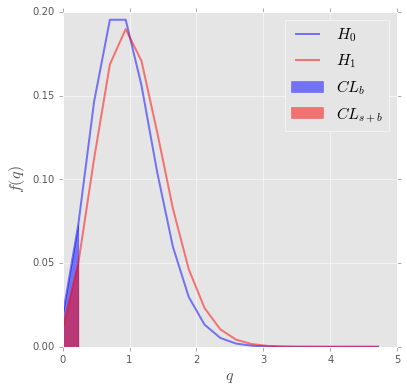

In [11]:
# the test-statistic function
def q(n, b=4, s=0.5):
    return 2*n*(np.log(b+s)-np.log(b))

# hipothesis
b, s = 4, 0.5
h0 = stats.poisson(b)
h1 = stats.poisson(b+s)

# ns: list of possible events
nmax = 21
n0 = 1

# as q(n) follows the same order of n, use only n
CLb = np.sum(h0.pmf(np.arange(0, n0+1)))
CLbs = np.sum(h1.pmf(np.arange(0, n0+1)))

print 'q(n={:d}) = {:4.2f}'.format(n0, q(n0))
print 'CLb, 1-p-value of H0 : {:5.3f} '.format(CLb)
print 'CLsb, beta or p-value of H1 : {:5.3f} '.format(CLbs)
print 'CLs for n : {:5.3f}'.format(CLbs/CLb)

# plot the pms for the qs values associated to the events ns, for both hypothesis
fig, ax = plt.subplots(figsize=(6, 6))
ns = np.arange(nmax)
ax.plot(q(ns), h0.pmf(ns), color='blue', lw=2, alpha=0.5, label='$H_0$')
ax.plot(q(ns), h1.pmf(ns), color='red', lw=2, alpha=0.5, label='$H_1$')
nsp = np.arange(0, n0+1)
ax.fill_between(q(nsp), 0., h0.pmf(nsp), color='blue', alpha=0.5, label=r'$CL_b$')
ax.fill_between(q(nsp), 0., h1.pmf(nsp), color='red', alpha=0.5, label=r'$CL_{s+b}$')
ax.set_ylabel('$f(q)$', fontsize=16)
ax.set_xlabel('$q$', fontsize=16)
ax.legend(fontsize=16)
fig.savefig('figs/ht_cls_intro.png')


Instead of using $\beta$ to reject $H_1$, we aply the CL cut on the value:

$$
CL_s \equiv \frac{CL_{s+b}}{CL_b} = \frac{\beta}{1-\alpha}
$$

A cut, $\xi$, i.e 5% ($\xi=0.05)$, on $CL_s$ implies to reject $H_1$ is the probability of find $H_1$ with equal or worse compatibility, is a fraction, $\xi$ of the probability of find $H_0$ with equal or better compatibility. 

In the example, $\beta = 0.06$, $H_1$ will be excluded at 99 % CL. But $CL_s \, = \, 0.67$, it is larger than 0.01 (exclusion at 99 % CL), and therefore, the $H_1$ is not excluded at 99 %CL (according with the CLs method). A more sensible result!

The CLs method penalize experiments without enough sensitivity to exclude alternative hypothesis! In the case that $H_1$ is well separated compared with $H_0$ a cut on $CL_s$ is equivalent to a cut on $\beta$!

The CLs method has been criticized as conservative, but still it is commonly used.

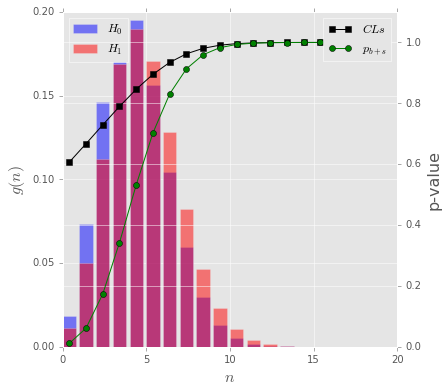

In [12]:
b = 4
s = 0.5
nmax = 20

h0 = stats.poisson(b)
h1 = stats.poisson(b+s)

def CLs(n):
    clb = np.sum(h0.pmf(np.arange(0, n+1)))
    clsb = np.sum(h1.pmf(np.arange(0, n+1)))
    return clsb/clb

def beta(n):
    return np.sum(h1.pmf(np.arange(0, n+1)))

fig, ax0 = plt.subplots(figsize=(6, 6))

ns = np.arange(nmax)
ps0 = h0.pmf(ns)
ps1 = h1.pmf(ns)
cls = np.array([CLs(ni) for ni in ns])
betas = np.array([beta(ni) for ni in ns])

ax0.bar(ns, ps0, color='blue', alpha=0.5, label='$H_0$')
ax0.bar(ns, ps1, color='red', alpha=0.5, label='$H_1$')
ax0.set_xlabel('$n$', fontsize=16)
ax0.set_ylabel('$g(n)$', fontsize=16)
ax0.legend(loc=2)

ax0b = ax0.twinx()
ax0b.plot(ns+0.4, cls, color='black', marker='s', label=r'$CLs$')
ax0b.plot(ns+0.4, betas, color='green', marker='o', label=r'$p_{b+s}$')
ax0b.set_ylim(0., 1.1)
ax0b.legend(loc=1)
ax0b.set_ylabel('p-value', fontsize=16)
fig.savefig('figs/ht_cls.png');

**Exercise:** Compute the CLs for the $b$ only hypothesis. Compute it now for the case of $b=4$ and $s=8$! If we observe a value in the median of the $b$ only hypothesis, do we exclude the hypothetical signal at 90% CL? 

---

## Bayesian approach

Let's now consider hypothesis testing through Bayesian statistics.
We want now to compute:

$$
p(H_1 \, | \, x), \, p(H_0 \, | \, x)
$$

the probability (degree of belief) of the $H_1, \; H_0$ hypothesis if we measure $x$.

Using Bayes' theorem, the probability of an hypothesis is:
$$
p(H \, | \, x ) = \frac{p(x \, |\,  H) \pi(H)}{p(x)} 
$$

Where $\pi(H)$, is the prior probability (degree of belief) of $H$. And,  $p(x)$, the probability to get the data considering all hypothesis, that is $p(x)$ = \sum_i p( x \, | \, H_i) \, \pi(H_i)$, the sum over the probability of getting that data over all the possible hypothesis.


In general, with a Bayesian treatament, we proceed in the following steps:
1. Estimate the priors of the relevant, $\mu$, parameters, the nuisance, $\theta$ paremeters, $\pi(\mu, \theta | H)$ and the hypothesis prior, $\pi(H)$, for all hypothesis. We will then marginalize the pdfs respect the parameters.
$$
p( x \, | \, H) = \int p(x \, | \, \mu, \theta, H) \, \pi(\mu, \theta \, | \, H) \mathrm{d} \mu \, \mathrm{d} \theta
$$
3. And the compute the probability of each hypothesis, using Bayes' theorem:
$$
p(H \, | \, x) = \frac{ p(x \, | \, H) \, \pi(H)}{\sum_i p(x \, | \, H_i) \, \pi(H_i)}
$$

A convenient quantity if the ratio of probabilities:
$$
\frac{ p(H_1 | x)}{ p(H_0 | x) } = \frac{ p(x | H_1)}{ p(x | H_0)} \, \frac{\pi(H_1)}{\pi(H_0)}
$$
where the first factor in the left side of the equation is the **Bayers factor**, 
$$
\frac{ p(x | H_1)}{ p(x | H_0)}
$$
that tells how much the measurement changes the prior ratio of probabilities between the hypothesis. It can be reinterpreted as $Z$ sigmas in the frequentist approach using the relation:
$$
Z = \log(B_{10}) \sqrt{2 B_{10}}
$$


And finally we compute:
1. The posterior probability of $H$. If there is a continuous hypothesis given by the strength $\mu$, we compute the posterior probability: $p(\mu \, | x)$. 
2. The confidence level intervals for the relevant parameters (see chapter on CL). In the case of continous hypothesis the CL of $\mu$.
3. The Bayes factor with respect the null hypothesis. $B_{10}(\mu)$

Let's consider two examples: a counting experiment with known background, and a second one where the background is estimated using a control region.


### Example: counting experiment

Consider the case of a counting experiment that expects $b$ background events, and a possible signal $s$ with an unknown strength $\mu s$. Consider that $b, \, s$ are known. 

The likelihood function is a poisson with mean $b+\mu s$, there is no nuisance parameters, as $b$ is known (in case you can include a delta $\pi(b) = \delta(b-b_0)$, where $b_0$ is the known background value). 

$$
f(n \, | \mu) = \frac{(b+\mu s)^n \, e^{-(b+\mu s)}}{n!}
$$

In order to compute the posterior probability we need the prior for $\mu$, $\pi(\mu)$, that to reflect our ingnorance we take as $\pi(\mu)=1$. The posterior is just simple:

$$
f(\mu | n) = \frac{p( n | \mu) \, \pi(\mu)}{ \int p(n | \mu) \pi(\mu) \mathrm{d}\mu}
$$
that is:
$$
f(\mu | n) = \frac{(b+\mu s)^n \, e^{-(b+\mu s)}}{m!}
$$
That we interprect as a $\Gamma(b+\mu s, n+1, 1)$ distribution. Remember:
$$
\Gamma(x , \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha) x^{\alpha-1} e^{-\beta x}}
$$
where $\Gamma(\alpha)$ is the Gamma function, the extension to real number of the factorial (i.e $\Gamma(n) = (n-1)!$).

From the posterior we can compute the confidence level (see chapter on CL).

The Bayes factor, comparing a hypothesis $\mu$, with respect the null $\mu=0$ is:

$$
B_{10} = \frac{f(n | b + \mu s)}{ f(n | b)} = \frac{(b+\mu s)^n}{b^n} e^{-\mu s}
$$



**Example:** Consider an experiment that expects: $b=1$ and $s=8$ and measurement $n=8$.  Compute $p(\mu | n)$, the 90% CL interval of $\mu$, and the bayes factor for $\mu=1$.

integral pmu : 1.00 
CL interval 95 % : [3.123, 14.751] 
CL interval 90 % : [3.700, 13.429] 
CL interval 68 % : [5.069, 10.931] 
Bayes factor B10 for s : 1.44e+04,  5.14 sigmas



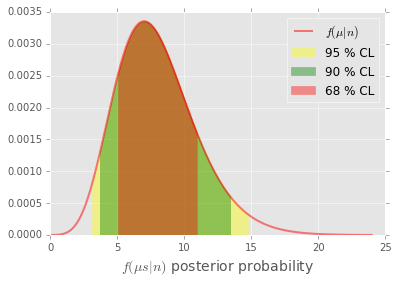

In [13]:
b, s = 1, 8
n = 8

fig, ax = plt.subplots(figsize=(6, 4))

mus = np.linspace(0., 3., 1000)
dmu = mus[1]-mus[0]
pmus = s*dmu*np.array([stats.gamma.pdf(b+mui*s, n+1) for mui in mus])
print 'integral pmu : {:4.2f} '.format(np.sum(pmus))

# plot the p(mu |n)
ax.plot(s*mus, pmus, alpha=0.5, color='red', lw=2, label='$f(\mu|n)$')
ax.set_xlabel('$f(\mu s|n)$ posterior probability', fontsize=14)

# compute CL
#def cl_central(mus, pmus, clval):
def cl_interval(mus, pmus, clval=68.):
    xval = (1-clval/100.)/2.
    nmus = len(pmus)
    s0s = np.array([np.sum(pmus[0:i+1]) for i in range(0, nmus)])
    s1s = np.array([np.sum(pmus[i:]) for i in range(0, nmus)])
    # ax.plot(mus, s0s, color='blue')
    # ax.plot(mus, s1s, color='black')
    i0s = [i for i in range(nmus) if s0s[i] < xval]
    ilow = 0
    if (len(i0s) > 0):
        ilow = i0s[-1]+1
    i1s = [i for i in range(1, nmus) if s1s[i] < xval]
    iup = nmus-1
    if (len(i1s) >0):
        iup = i1s[0]-1
    #print ilow, mus[ilow], s0s[ilow-1], s0s[ilow]
    #print iup, mus[iup], s1s[iup], s1s[iup+1]
    return ilow, iup

colors = ['yellow', 'green', 'red']
for i, cl in enumerate([95., 90., 68.]):
    color = colors[i]
    i0, i1 = cl_interval(mus, pmus, cl)
    print 'CL interval {:d} % : [{:5.3f}, {:5.3f}] '.format(int(cl), s*mus[i0], s*mus[i1])
    ax.fill_between(s*mus[i0:i1+1], 0., pmus[i0:i1+1], color=color, alpha=0.4,  
                     label='{:d} % CL'.format(int(cl)))

ax.legend()
# bayes factor
b10 = stats.poisson.pmf(n, b+s)/stats.poisson.pmf(n, b)
zb10 = np.log(np.sqrt(2*b10))
print 'Bayes factor B10 for s : {:4.2e}, {:5.2f} sigmas'.format(b10, zb10)
print ''



### Example: counting experiment with control region

Consider now a counting experiment that expects $b+\mu s$ events in the signal region and $\tau \, b$ events in the control region. $s, \tau$ are know. 

Here the nuisance parameter is $b$, as $\tau$, and the relevant parameter is $\mu$. The pdf distributions are, for the control region, a poisson with mean $\tau b$ and for the signal region, a second poisson with mean $b+\mu s$, with $\mu=0$ for $H_0$ and $\mu=1$ for $H_1$.  


First, se compute $p( n | \mu s, H_\mu)$, for that we marginalize the nuisance parameter, with the prior $\pi(b)$.

$$
p (n | \mu s ) = \int p(n | b+\mu s) \, \pi(b) \mathrm{d}b
$$

Where:
$$
p(n | b+ \mu s) = \frac{(b+\mu s)^n \, e^{-(b+s)}}{ n!}
$$
$n$ is poisson distributed with mean $b+\mu s$

Now, $\pi(b)$, the prior, based on the measurement of $m$ events in the control region. For that we can use: 
$$
\pi(b | \, m)  = \frac{(\tau b)^m \, e^{-\tau b}}{ m!} = \Gamma(\tau b, m+1, 1)
$$

$\Gamma(x, \alpha, \beta)$ (with $x, \alpha, \beta$ defined positive) is the gamma distribution. It is usefull when dealing with parameters estimation based on poisson distributions, as is the case.

After some calculations, we get:
$$
p( n | \mu s) = \frac{1}{m} \frac{\tau^2}{(1+\tau)^2} \sum_{r=0}^n \beta \left(\frac{1}{1+\tau}, r+1, m \right) \, \mathrm{p}(n-r | \mu s) 
$$

where $p(n-r| \mu s)$ is the likelihood of a poisson distribution with mean $\mu s$ with and measurement $n-r$.
And $\beta(x, \alpha, \beta)$ (with $p \in [0.,1]$ anad $\alpha, \beta$ defined positive) is the beta distribution:
$$
\beta(p, \alpha, \beta) = \frac{\Gamma (\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} p^{\alpha-1} (1-p)^{\beta-1}
$$
The $\beta$ distribution is associated with the estimation of a probability $p$. Notice for example that the case $\alpha=1, \, \beta=1$ is a uniform distribution in $p$.

Now we can compute the probability of each hypothesis (for $\mu s$ given the data $n, m$):
$$
p(\mu s | n, m ) = \frac{p(n | \mu s) \, \pi(\mu s)}{ \int_\mu p(n | \mu s) \pi(\mu s)}
$$

If we take a flat prior, $\pi(\mu s) = 1$, to reflect our absence  of "information", we get the posterior probability:

$$
p(\mu s | n, m ) = \frac{\sum_{r=0}^n \beta(\frac{1}{1+\tau}, r+1, m) \mathrm{p}( n-r | \mu s)} {\sum_{r=0}^n \beta(\frac{1}{1+\tau}, r+1, m)} 
$$



**Example:** Consider the case $s=8$, a control region with $\tau=10$, and a measurement $n=8$ in the signal region and $10$ in the control region. Compute $p(\mu | n, m)$

tau, signal  10.0 8.0
m, n  10 8
 integral prior 1.00
CL interval 95 % : [0.556, 1.818] 
CL interval 90 % : [0.606, 1.717] 
CL interval 68 % : [0.758, 1.414] 
 integral posterior 1.00
CL interval 95 % : [1.939, 17.212] 
CL interval 90 % : [2.424, 16.000] 
CL interval 68 % : [3.394, 13.818] 


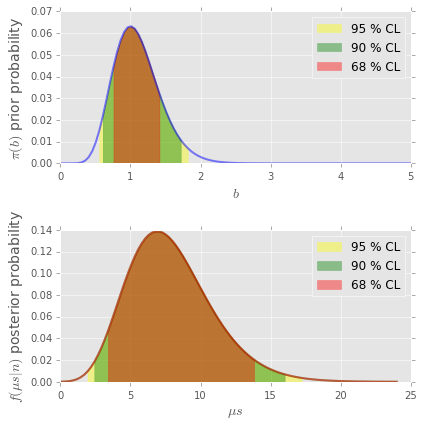

In [14]:
tau, s = 10., 8.

m, n = 10, 8

def ptaub(b, m, tau):
    return stats.gamma.pdf(tau*b, m+1)

def pnmu(mu, n, m, tau, s):
    ptau = 1./(1.+tau)
    bs = np.array([stats.beta.pdf(ptau, r+1, m) for r in range(0, n+1)])
    ps = np.array([stats.poisson.pmf(n-r, mu*s) for r in range(0, n+1)])
    val = ((1.-ptau)*(1.-ptau)/(1.*m))*np.sum(bs*ps)
    return val

def pmu(mu, n, m, tau, s):
    ptau = 1./(1.+tau)
    bs = np.array([stats.beta.pdf(ptau, r+1, m) for r in range(n+1)])
    ps = np.array([stats.poisson.pmf(n-r, mu*s) for r in range(n+1)])
    val = np.sum(bs*ps)/np.sum(bs)
    return val


fig, axs = plt.subplots(2, 1, figsize=(6, 6))
ax0, ax1 = axs.ravel()

print 'tau, signal ', tau, s
print 'm, n ', m, n

# plot the b prior
xbs = np.linspace(0., 5., 100)
db = xbs[1]-xbs[0]
pbs = tau*db*np.array([ptaub(bi, m, tau) for bi in xbs])
print ' integral prior {:4.2f}'.format(np.sum(pbs))
ax0.plot(xbs, pbs, color='blue', alpha=0.5, lw=2)
ax0.set_xlabel(r'$b$', fontsize=14)
ax0.set_ylabel(r'$\pi(b)$ prior probability ', fontsize=14)

for i, cl in enumerate([95., 90., 68.]):
    color = colors[i]
    i0, i1 = cl_interval(xbs, pbs, cl)
    print 'CL interval {:d} % : [{:5.3f}, {:5.3f}] '.format(int(cl), xbs[i0], xbs[i1])
    ax0.fill_between(xbs[i0:i1+1], 0., pbs[i0:i1+1], color=color, alpha=0.4,  
                     label='{:d} % CL'.format(int(cl)))
ax0.legend(fontsize=12)

mus = np.linspace(0., 3., 100)
dmu = mus[1]-mus[0]
pnmus = np.array([pnmu(imu, n=n, m=m, tau=tau, s=s) for imu in mus])
pmus = np.array([pmu(imu, n=n, m=m, tau=tau, s=s) for imu in mus])
print ' integral posterior {:4.2f}'.format(np.sum(pmus)*dmu*s)
ax1.plot(s*mus, pnmus, color='green', alpha=0.5, lw=2)
ax1.plot(s*mus, pmus, color='red', alpha=0.5, lw=2)

colors = ['yellow', 'green', 'red']
for i, cl in enumerate([95., 90., 68.]):
    color = colors[i]
    i0, i1 = cl_interval(mus, pmus, cl)
    print 'CL interval {:d} % : [{:5.3f}, {:5.3f}] '.format(int(cl), s*mus[i0], s*mus[i1])
    ax1.fill_between(s*mus[i0:i1+1], 0., pmus[i0:i1+1], color=color, alpha=0.4,  
                     label='{:d} % CL'.format(int(cl)))
ax1.set_xlabel('$\mu s$', fontsize=14)
ax1.set_ylabel('$f(\mu s | n)$ posterior probability', fontsize=14)
ax1.legend(fontsize=12)

fig.tight_layout()
fig.savefig('figs/ht_bayesian_approach.png')

**Exercise:** Compare the results with the Bayesian method, and the frequentist using the profile likelihood ratio as test statistic.

**Exercise:** The previous experiment does two measurments: $m_1=10, n_1 = 8$ and $m_2 = 9, n_2 = 9$, compute the bayesian posterior probability $p(\mu s | x)$ and the bayes factor for $\mu=1$.

-----

## Bibliography

[1] "Practical Statistic for LHC physicist," H. B. Prosper, CERN Academic Training Lectures (2015). https://indico.cern.ch/event/358542/ https://arxiv.org/pdf/1504.00945.pdf

[2] "Statistic for HEP," G. Cowan. CERN Academic Training Lectures (2012). http://indico.cern.ch/event/173726/

[3] "Statistics for Particle Physics," K. Cranmer, CERN Academic Training Lectures (2009). 
https://indico.cern.ch/event/48425/

[4] "Unified approach to the classical statistical analysis of small signals, "G. J. Feldman and R. D. Cousins, Phys. Rev. D57 (1998) 3873. http://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.3873

[5] “Asymptotic formulae for likelihood-based tests of new physics,” Glen Cowan, Kyle Cranmer, Eilam Gross, Ofer Vitells. Eur. Phys. J. C71 1554 (2011). https://arxiv.org/abs/1007.1727

[6] "Incorporating systematic uncertainties into an upper limit," R.D. Cousins and V.L. Highland. Nucl. Instrum. Meth. A320, 331 (1992). http://www.sciencedirect.com/science/article/pii/0168900292907945

[7] "Confidence Level Computation for Combining Searches with Small Statistics," T. Junk, Nucl. Instrum. Meth. A434, 435 (1999). https://arxiv.org/abs/hep-ex/9902006  

[8] ROOT https://root.cern.ch, TMVA http://tmva.sourceforge.net, RooFit https://root.cern.ch/roofit

[9] Anaconda https://anaconda.org, SciPy https://www.scipy.org, NumPy http://www.numpy.org, Scikit-learn http://scikit-learn.org/stable/, Matplotlib http://matplotlib.org
